In [143]:
#Import Dependencies
! pip install missingno
import missingno as msno
import numpy as np
import pandas as pd
import os
import seaborn as sns
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from matplotlib import pyplot as plt

In [144]:
import warnings
warnings.filterwarnings("ignore")

In [145]:
#Create the reference to the CSV for Movies
movies_df = "Resources/tmdb_5000_movies.csv"

In [146]:
#Read and display the CSV with Pandas DataFrame
movies_df_pd = pd.read_csv(movies_df, error_bad_lines = False)
movies_df_pd.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [147]:
## graph on cleaning here -- disregard

# movies_df_pd.set_index('title')['vote_average'].plot();

# movies_df_pd = pd.DataFrame({'Movie Title': ['Avatar', 'Pirates', 'Spectre', 'The Dark Knight', 'John Carter'], 'Average Vote':[7.2, 6.9, 6.3, 7.6, 6.1]})

#ax = movies_df_pd.plot.bar(x='Movie Title', y='Average Vote', rot=60)

In [148]:
#Print the number of rows and columns
print("Dataset contains {} rows and {} columns".format(movies_df_pd.shape[0], movies_df_pd.shape[1]))

Dataset contains 4803 rows and 20 columns


In [149]:
#Get a reference to the columns
movies_df_pd.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [150]:
#Rename the Column
new_movies_df = (movies_df_pd.rename(columns={'title': "Title",
                                             'original_language': "Original Language",
                                             'release_date': "Release Date"}))

In [151]:
#Print the Column renamed
new_movies_df.head()

,budget,genres,homepage,id,keywords,Original Language,original_title,overview,popularity,production_companies,production_countries,Release Date,revenue,runtime,spoken_languages,status,tagline,Title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [152]:
#Drop the columns not needed and print
new_movies_df_1 = new_movies_df.drop(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'vote_average', 'vote_count'], axis = 1) 
new_movies_df_1.head()

,Original Language,Release Date,Title
0,en,2009-12-10,Avatar
1,en,2007-05-19,Pirates of the Caribbean: At World's End
2,en,2015-10-26,Spectre
3,en,2012-07-16,The Dark Knight Rises
4,en,2012-03-07,John Carter


In [153]:
#msno.heatmap(new_movies_df_1)

Text(0.5, 1.0, 'Language vs. Count')

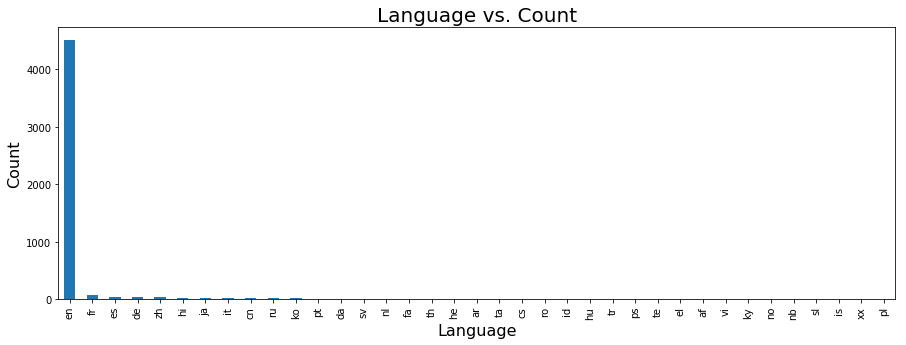

In [217]:
plt.figure(figsize=(15,5))
ax = new_movies_df_1['Original Language'].value_counts().plot(kind='bar')

ax.set_xlabel('Language', fontsize=16)
ax.set_ylabel('Count', fontsize=16)

ax.set_title('Language vs. Count', fontsize=20)



In [218]:
#Sort 'Title' column to be the first column
new_movies_df = new_movies_df[['Title', 'Original Language', 'Release Date']]
new_movies_df.head()

,Title,Original Language,Release Date
0,Avatar,en,2009-12-10
1,Pirates of the Caribbean: At World's End,en,2007-05-19
2,Spectre,en,2015-10-26
3,The Dark Knight Rises,en,2012-07-16
4,John Carter,en,2012-03-07


In [69]:
#Sort Title Column in Ascending order
new_movies_df.sort_values('Title',inplace=True)
new_movies_df.head()

,Title,Original Language,Release Date
4257,#Horror,de,2015-11-20
3339,(500) Days of Summer,en,2009-07-17
3556,10 Cloverfield Lane,en,2016-03-10
2903,10 Days in a Madhouse,en,2015-11-20
2739,10 Things I Hate About You,en,1999-03-30


In [12]:
#Find how many Null Values there are
null_columns = new_movies_df.columns[new_movies_df.isnull().any()]
new_movies_df[null_columns].isnull().sum()

Release Date    1
dtype: int64

In [13]:
#Locate the null value to the movie title
new_movies_df.loc[4553]

Title                America Is Still the Place
Original Language                            en
Release Date                                NaN
Name: 4553, dtype: object

In [14]:
#Fill in Null Value
new_movies_df2 = new_movies_df.fillna("2015-03-01")


In [15]:
print(new_movies_df2[new_movies_df["Release Date"].isnull()][null_columns])

     Release Date
4553   2015-03-01


In [16]:
#Print new table
new_movies_df2.head()

,Title,Original Language,Release Date
4257,#Horror,de,2015-11-20
3339,(500) Days of Summer,en,2009-07-17
3556,10 Cloverfield Lane,en,2016-03-10
2903,10 Days in a Madhouse,en,2015-11-20
2739,10 Things I Hate About You,en,1999-03-30
